In [5]:
from IPython.display import FileLink, FileLinks

Let op: run `install_requ`

# Draaiboek

Mijn stage folder staat vol met een hoop Notebooks zonder dat de nuance duidelijk is. Dit bestand geeft de stappen van een Computer Vision project en verwijst je naar de bijhorende bestanden.

In het geval jupyter notebook of programmeren nieuw is voor je druk op onderstaande link

In [5]:
FileLink('Algemene Tips.html')

E:\Studie\Stage\Notebooks\Algemene Tips.html

## Algemene planning
Voor een Computer Vision project is er 
een algemene planning die vaak (niet persee in detail) wordt gevolgd.

## Dataset Samenstellen

Het bouwen van een Computer Vision model begint bijna altijd bij het verzamelen van de data. Wanneer de dataset perfect is is succes van het model zo goed als gegarandeerd. Bestudeer onderstaande notebook voor alle ins en outs.

In [14]:
FileLink('Dataset Samenstellen\\Dataset Samenstellen.ipynb')

E:\Studie\Stage\Notebooks\Dataset Samenstellen\Dataset Samenstellen.ipynb

Voor je de dataset samenstelt moet de keuze tussen de verschillende vormen van computer vision al zijn gedaan. Met als keuzes: Classification, Detection en Segmentation. Als het niet duidelijk is welk type model je wilt maken ga door naar het kopje 'Model Trainen' -> 'Model keuze'.

## Data Verwerken

### Gewenste Folder Structuur

Afhankelijk van het type model dat je gaat trainen zijn er verschillende soorten aanbevolen structuren. 
Zorg dat je data op deze manier gestructuurd staat in het geval je gebruik wil maken van libraries (Extreem aan te raden). 

#### Image Classification

Bij image classification wil je de de afbeeldingen verdeeld per class name:

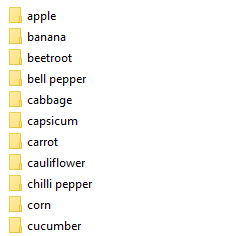

Je zou al de afbeeldingen kunnen verdelen over een test, train en validatie set.

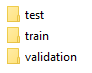

Doe dit op het moment dat je een specifiek idee hebt waar je welke afbeeldingen wilt hebben, zo niet doe het verdelen met code (de aanbevolen methode).

#### Object Detection

Bij Image Detection wil je alle afbeeldingen in de zelfde map hebben. 

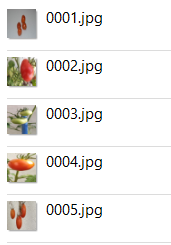

Daarnaast wil je een tweede folder met alle label files. 

De namen van de afbeelding en het label moeten het zelfde zijn zodat de code het herkent als paar. Deze twee folders kunnen ook weer over test, train en validatie worden gesplitst. Let hierbij wel op dat de paren in dit proces niet worden gesplitst.

__Splitsen in training, validatie, en testsets__: Dit doen we met een verdeling zoals 70-15-15, waarbij elke set representatief is voor de variatie in de dataset. Deze splitsing moet willekeurig maar evenwichtig per klasse zijn.

### Data Augmentatie

Voor het model getraind gaat worden doen we nog aanpassingen aan de dataset. Dit doen we om: de dataset bruikbaar te maken, het model robuster, klasse balans recht te trekken al met al de dataset te optimaliseren voor het gebruik. 

#### Normaliseren

Normaliseren is de schaalveranderingen van de invoerdata zodat het binnen een bepaalde range valt, meestal tussen 0 en 1, of een standaard normaalverdeling met een gemiddelde van 0 en een standaarddeviatie van 1.

__Waarom normaliseren?__
1. **Consistente Schaal:** Verschillende features kunnen sterk uiteenlopende schalen hebben. Normaliseren brengt ze op een vergelijkbare schaal, waardoor algoritmen zoals SGD beter kunnen werken omdat ze minder tijd verliezen met het omgaan met grote, ongelijke stappen in verschillende richtingen.

2. **Snellere Convergentie:** Door data te normaliseren kan het optimalisatieproces sneller en effectiever verlopen, omdat de cost function uitkomsten/resultaten meestal beter behandeld kunnen worden met genormaliseerde data.

3. **Voorkomen van Dominantie door Groot-schaalfactoren:** Features met grote waardes kunnen bijdragen aan een onevenredig grote [gradiënt](https://builtin.com/data-science/gradient-descent), wat kan leiden tot instabiliteit in het model. Normalisatie beperkt dit effect.
Pas normalisatie toe om de pixelwaardes naar een vergelijkbaar bereik te brengen, dit doen we gestandaardiseerd met het gemiddelde en standaardafwijking van de dataset.


__Impact van Normalisatie:__

- **Verbeterde Modelprestaties:** Vooral bij modellen die afhankelijk zijn van gradiënt-gebaseerde optimalisatie, zoals neurale netwerken, kan normalisatie leiden tot snellere convergentie en betere prestaties.
  
- **Verhoogde Stabiliteit:** Het helpt om numerieke instabiliteit te verminderen en voorkomt dat algoritmen worstelen met hoge waarden of afwijkende waarden.

- **Betere Generalisatie:** Door ervoor te zorgen dat alle features een gelijke footing hebben, kan normalisatie helpen een betere generalisatie van modellen te behalen op ongeziene data door overfitting te verminderen.

#### Uniforme afbeeldingsgrootte

Het model verwacht altijd een zelfde input grootte anders is het niet mogelijk om te leren. Omdat de afbeeldingen vaak variëren in grootte, transformeren weze naar een uniforme grootte. (bijvoorbeeld 224x224 pixels, wat standaard is voor veel CNN's zoals ResNet of EfficientNet [verdere uitleg over 224x224](https://www.quora.com/Why-many-deep-learning-models-take-224x224-images-as-input)). Hiervoor gebruiken we een methode zoals cropping, resize (met of zonder padding) of een adaptive pooling laag. De afbeeldingsgrootte is van belangaangezien als deze te klein is het details verliest waardoor het resultaat slechter is, een te hoge afbeeldingsgrootte zorgd voor een langere traintijd (en het upscalen van de afbeeldingen is ook af te raden door gebrek aan detail).

Als je gebruik wilt maken van een pre-trained model is de bijhoorende uniforme grootte verplicht. Elke pixel achter elkaar gezet wordt gezien als de input layer. Deze kunnen we dus niet aanpassen aangezien het getrainde model alleen deze grootte kent.

#### Extra Augmentatie methodes

- __Random cropping__: De afbeelding inzoomen zodat een deel van het object vervalt.
- __Random Erasing__: In de afbeelding een stuk overlappen zodat niet het hele object meer zichtbaar is.
- __Rotaties__: De afbeelding draaien om verschillende hoeken van het object te simuleren.
- __Lichtvariaties__: pas helderheid, contrast en kleurveranderingen toe om te trainen op verschillende lichtomstandigheden.
- __Shearing en schalen__: Door geometrische vervorming toe te voegen kunnen we de robuustheid vergroten.
- __Flippen en spiegelen__: zorgt voor variatie in oriëntatie.
- __Occlusie simulatie__: soms zijn objecten gedeeltelijk bedekt. Gebruik augmentaties zoals **Cutout of Gaussian blur**(*verder onderzoeken*) om dit soort scenario’s te simuleren.

Onderstaande notebook voert deze methodes handmatig uit om een beter beelt te geven op hoe de set er uit gaat zien.

In [119]:
# Handmatig afbeeldingen aanpassen
FileLink('Dataset Samenstellen\\Image Processing.ipynb')

E:\Studie\Stage\Notebooks\Dataset Samenstellen\Image Processing.ipynb

Deze stappen hoef je gelukkig niet allemaal zelf uit te voeren.

#### Dataloader / Transformer

Het is aanbevolen om gebruik te maken van Dataloaders en Transformers. Hierdoor ben je in het algemeen wel verplicht de bijhorende libraries te gebruiken van de loader. Dit is een kleine opgave aangezien dataloaders het inladen van de data automatisch doet met de juiste structuur (van hier boven). Waarbij de Transformer de meegegeven data augmentatie stappen toepast.

Onderstaande notebook laad een dataset in doormiddel van de dataloader

In [156]:
FileLink('Dataset Samenstellen\\PyTorch Data Loading - Vegetable Image Dataset.ipynb')

E:\Studie\Stage\Notebooks\Dataset Samenstellen\PyTorch Data Loading - Vegetable Image Dataset.ipynb

In dit voorbeeld was de Transformer nog minimaal:
```
# Transformeer de data bij het inladen
transform = transforms.Compose([
    transforms.Resize((128, 128)), # de afbeeldingen zijn al het zelfde formaat (en niet te groot dus deze stap is niet nodig)
    transforms.ToTensor()
])
```
Voor meer informatie over welke methodes toe te passen lees de [transform docs](https://pytorch.org/vision/stable/transforms.html) of Google de taak die je zoekt. *(Kijk eventueel verder bij de happyflow uitvoering hoe de transform is gebruikt voor data augmentation.)*

## Model Trainen

### Model Keuze

Om te bepalen welk type model je gaat maken kijk je naar het doel van het project.

   - Moet het model objecten in een afbeelding classificeren? *(De gehele afbeelding als een klasse zien)* **Classification**
   - Moet het model objecten lokaliseren en identificeren? *(Klasse in de afbeelding vinden en de locatie daarvan)* **Detection**
   - Moet het model elke pixel van een afbeelding classificeren in een bepaald segment? *(Is elke pixel in de afbeelding van belang?)* **Segmentation**

Wanneer je een nieuw model wilt opbouwen is het goed om eerst naar soort gelijke projecten te kijken om te zien wat werkt. In het algemeen is de beste keuze om gebruik te maken van een pre-trained model die al kennis heeft over je klasse. Neem als voorbeeld ResNet50, een model wat getraind is op 1000 klasse:

In [71]:
# ResNet50 classes
FileLink('..\\Data\\imagenet-classes.txt')

E:\Studie\Stage\Data\imagenet-classes.txt

Door zo'n voorgetraind model te nemen weet je dat de architectuur correct is voor soortgelijke opdrachten. Verder bezitten de weights al informatie over je mogelijke targets/doel klasse, dit kan het train proces een stuk sneller maken doordat het niet vanaf 0 begint. (Dit principe wordt ook transfer learning genoemd.)

Bekijk onderstaande notebook voor vragen die kunnen helpen met het maken van een keuze tussen welke pre-trained model / structuur.

In [13]:
FileLink('Overig\\model keuze.ipynb')

E:\Studie\Stage\Notebooks\Overig\model keuze.ipynb

### Hyperparameters 
Loss, optimizers en evaluatiemetrics

Op het moment dat je de model keuze hebt gemaakt is het tijd voor de hyperparameters, dit zijn de verschillende functies / methodes die het model achter de schermen laten runnen. Dit is vaak ook het deel waar verschillende opties worden geprobeerd voor het behalen van een beter of sneller resultaat. Weet wel dat op het moment dat de data en het resultaat niet goed is dat het aanpassen van de hyperparameters dit niet toch succesvol kan maken. Zie dit meer als het bijsleutelen van het model.

#### Loss Function

De criterion of vaker genoemde loss function houdt de afwijking van het model bij, specifieker de afstand tussen het voorspelde antwoord en het correcte antwoord op basis van een formule. Modellen en doeleindes verschillen zo dus ook de loss functions. Het is mogelijk onderzoek te doen naar welke loss function optimaal is voor huidige doeleindes maar raad dit af. Dit process is ook goed te doen door middel van het resultaat testen, ChatGPT vragen of na het bepalen van een optimizer een goed bijpassende loss function te kiezen.

[Diepere uitleg werking loss-function](https://www.datacamp.com/tutorial/loss-function-in-machine-learning)  -  [Veel voorkomende loss-functions](https://builtin.com/machine-learning/common-loss-functions)

##### Standaard Loss functions

1. **Image Classification:**
   - **Categorical Cross-Entropy:** Wordt vaak gebruikt bij meerklasse-classificatieproblemen.
   - **Binary Cross-Entropy:** Wordt gebruikt voor tweetalige classificatieproblemen.

[Cross-Entropy](https://365datascience.com/tutorials/machine-learning-tutorials/cross-entropy-loss/)

2. **Object Detectie:**
   - **Focal Loss:** Helpt bij het omgaan met klassenonevenwicht door moeilijkere voorbeelden te benadrukken.
   - **Intersection over Union Loss:** Wordt soms gebruikt om de nauwkeurigheid van boksvoorstellen te verbeteren.
   - **Smooth L1 Loss:** Wordt gebruikt in modellen zoals Faster R-CNN voor coördinatieregressie.
   - **YOLO Loss en SSD Loss:** Specifieke combinaties van classificatie- en regressieverliezen die worden gebruikt in respectievelijk YOLO- en SSD-modellen.

[YOLO Loss Explained](https://stats.stackexchange.com/questions/287486/yolo-loss-function-explanation)

3. **Segmentatie:**
   - **Soft Dice Loss:** Populair in medische beeldsegmentatie, met name bij onevenwichtige klassen.
   - **Jaccard Loss (Intersection over Union Loss):** Wordt soms gebruikt voor pixelwijzematchingscores.
   - **Cross-Entropy Loss:** Wordt vaak gebruikt in semantische segmentatietaken voor pixelwijze classificatie.

#### Optimizer

In Machine Learning projecten spelen optimizers in het algemeen een cruciale rol bij het trainen van modellen. De keuze voor een specifieke optimizer kan afhangen van verschillende factoren, inclusief de aard van de dataset, het model, en de gewenste balans tussen snelheid en nauwkeurigheid. Bekijk onderstaande video's voor een beter begrip over de werking van een optimizer.

[3Blue 1Brown: Gradient Descent how Neural Networks learn](https://www.youtube.com/watch?v=IHZwWFHWa-w) - [Gradient Descent - 3 minutes](https://www.youtube.com/watch?v=qg4PchTECck)

Hier zijn enkele standaardopties voor optimizers en overwegingen waarom je welke zou gebruiken:

**Adam (Adaptive Moment Estimation):**

[Adam Explained](https://builtin.com/machine-learning/adam-optimization)
   - **Standaard Opties:** Goed gedefinieerde standaard parameters (\(\beta_1 = 0.9\), \(\beta_2 = 0.999\)), die meestal goede prestaties leveren zonder veel tuning.
   - **Overwegingen:** Adam is vaak de eerste keuze als je snel resultaten wilt krijgen zonder veel tufines. Het combineert de voordelen van twee andere veelgebruikte methodes: AdaGrad en RMSProp.

**Stochastic Gradient Descent (SGD):**

[Stochastic Gradient Descent Explained](https://towardsdatascience.com/stochastic-gradient-descent-clearly-explained-53d239905d31)
   - **Standaard Opties:** Vaak gebruikt met momentum, wat helpt om oscillaties (het heen en weer bewegen tussen twee uiterste waardes - vaak tezien in de loss) tijdens het trainen te verminderen en een snellere convergentie (het punt waarop de voorspellingen van het model niet meer verbeteren, of de loss constant wordt) te bereiken.
   - **Overwegingen:** SGD met momentum is geschikt voor grote datasets en situaties waar je de convergentie fijn wilt afstemmen. Het vereist handmatige tuning van de leersnelheid, wat zowel een nadeel als een voordeel kan zijn.

**AdaGrad:**
   - **Standaard Opties:** Past de leersnelheid aan voor elke parameter op basis van de som van de vierkanten van alle voorgaande gradients.
   - **Overwegingen:** Goed voor zeldzame en sprankelende kenmerken, maar kan problematisch worden als de leersnelheid te veel daalt.

**RMSProp:**

[RMSProp Explained](https://www.datacamp.com/tutorial/rmsprop-optimizer-tutorial)
   - **Standaard Opties:** Houdt een bewegend gemiddelde van de vierkante gradients bij, en deelt door de wortel van deze gemiddelde waarde.
   - **Overwegingen:** Ontwikkeld om de valkuilen van AdaGrad op te lossen, en werkt goed voor niet-stationaire doelen, wat vaak het geval is in real-world deep learning.

**AdamW:**
   - **Standaard Opties:** Een variant van Adam met decoupled weight decay. Dit voorkomt problemen die voortkomen uit de standaard L2 regularisatie in Adam.
   - **Overwegingen:** Helpt bij de algemene generalisatie en convergentie en is vaak beter bij het trainen van transformer-gebaseerde modellen.

**Nesterov Accelerated Gradient (NAG):**
   - **Standaard Opties:** Een variatie van momentum-gebaseerde methodes die verder moet helpen om sneller te convergeren.
   - **Overwegingen:** Het kan nuttig zijn voor zeer diepe netwerken vanwege hun abiliteit om zijn horizon van leersnelheden voor elke parameter aan te passen.

##### Overwegingen bij het kiezen van een optimizer:

- **Niet-lineaire datasets:** Opties zoals Adam helpen met het leren van complexe patronen door dynamische aanpassingen van de leersnelheid.
- **Rekenkosten:** Simpele optimizers zoals SGD kunnen efficiënter zijn in termen van geheugen en snelheid op heel grote datasets.
- **Tuning-behoeften:** Sommige optimizers zoals Adam vereisen minder hyperparameter tuning, terwijl optimizers zoals SGD aanzienlijke moeite kunnen vereisen om ze goed te tunen.
- **Generalisatie:** Weight decay en optimizerkeuzes zoals AdamW kunnen helpen om overfitting te beperken en beter te generaliseren naar testdata.

Bij het kiezen van een optimizer, moet je ook overwegen wat historisch goed heeft gewerkt voor vergelijkbare taken en modellen binnen jouw specifieke domein. Het kan nuttig zijn om met verschillende optimizers te experimenteren om te zien welke het beste presteert in jouw specifieke situatie.

#### Metrics

Tijdens het trainen zijn er verschillende evaluatie metrics om in de gaten te houden. Bij image detection komen er nog een paar bij, deze worden in het `Image Detection` deel behandeld.
Bij image classification zijn verschillende metrics die je kunt gebruiken om de prestaties van je model te evalueren. Hier zijn de meest voorkomende:

1. **Accuracy**: Dit meet het percentage correcte voorspellingen over alle voorbeelden. Hoewel het nuttig is, kan het misleidend zijn in geval van een scheve klassenverdeling.

2. **Precision**: Dit is het percentage daadwerkelijke positieve voorspellingen uit alle positieve voorspellingen. Het is vooral nuttig als de kosten van vals-positieven hoog zijn.

3. **Recall (of Sensitivity)**: Dit is het percentage correcte positieve voorspellingen uit alle daadwerkelijke positieve gevallen. Het is cruciaal wanneer de kosten van gemiste positieve voorbeelden hoog zijn.

4. **F1-score**: Dit is het harmonisch gemiddelde van precision en recall. Het is nuttig wanneer je een balans wilt vinden tussen precision en recall, vooral bij een ongelijke klassenverdeling.

5. **Confusion Matrix**: Dit is een tabel die de prestaties van een classificatiemodel laat zien, met de werkelijke klassen tegenover de voorspelde klassen. Het geeft inzicht in correct geclassificeerde en verkeerd geclassificeerde voorspellingen.

Deze metrics helpen je verschillende aspecten van je modelprestaties te begrijpen, en de keuze van welke te gebruiken hangt vaak af van de specificiteiten en eisen van je project. Zo is voor een toezicht systeem `precision` van hoger belang voor het voorkomen van false positives. Bij het herkennen van tumors is `recall` belangrijker aangezien false negatives veel schadelijker zijn dan false positives. Bepaal opbasis van wat voor jou model het handigst op welke metrics je het meest gaat letten.  In het geval je het zo simpel mogelijk voor jezelf wilt maken let dan op de `F1-score`.

#### Trainingsprocedure

Tijdens het train proces krijg je altijd te maken met batch size en epochs, dit zijn de hoeveelheid afbeeldingen voor het model de weights aanpast en het totaal aantal keer dat het model door de hele trainings data heen gaat. [Verdere uitleg](https://www.sabrepc.com/blog/Deep-Learning-and-AI/Epochs-Batch-Size-Iterations)

Om niet zelf het aantal epochs te hoeven bepalen en zo mogelijk het proces te vroeg of laat te stoppen kan je gebruik maken van [early stopping](https://cyborgcodes.medium.com/what-is-early-stopping-in-deep-learning-eeb1e710a3cf) en/of [learning rate scheduler](https://neptune.ai/blog/how-to-choose-a-learning-rate-scheduler)

__Kort om__:
- __Batch size en epochs__: Kies de juiste batchgrootte die past bij de hoeveelheid beschikbare GPU/CPU-kracht, dit is standaard 32. Dan trainen we met voldoende epochs om een goede generalisatie te bereiken.
- __Early stopping__: Dit is het bijhouden van de loss op de validatie set, als deze een aantal epochs niet verbeterd. We gebruiken early stopping om overfitting te voorkomen. 
- __Learning rate scheduling__: Gebruik een learning rate scheduler (bijv. reduce on plateau) om de learning rate automatisch aan te passen wanneer de prestaties stagneren.

## Evaluatie en Implementatie

Nadat het trainen van het model is voltooid is het tijd de resultaten te evalueren. Het balanceren van de complexiteit van een model is essentieel om een goed generaliserend model te ontwikkelen dat even goed presteert op zowel trainings- als testdata.

#### Underfitting

**Definitie:** Underfitting treedt op wanneer een model te simpel is om de onderliggende patronen in de trainingsdata vast te leggen. Het model presteert slecht op zowel de trainingsdata als de nieuwe, ongeziene data.
  
**Oorzaken:**
  - Een te eenvoudig model kiezen (bijvoorbeeld een lineair model voor een niet-lineaire dataset).
  - Onvoldoende trainingsdata of te veel noise in de data.
  - Te sterke regularisatie die de complexiteit van het model vermindert.

**Gevolgen:** 

Het model heeft een hoge bias maar een lage variantie, wat resulteert in slechte voorspellingen en generalisering.

**Oplossing:**
  - Gebruik een complexer model dat rijkere patronen kan vasthouden.
  - Gebruik meer relevante features.
  - Train langer of met een andere optimizer/hogere leersnelheid.

#### Overfitting

**Definitie:** Overfitting treedt op wanneer een model te complex is en niet alleen de onderliggende patronen in de trainingsdata leert, maar ook de ruis en specifieke details ervan. Hierdoor presteert het uitstekend op de trainingsdata maar slecht op nieuwe, ongeziene data.
  
**Oorzaken:**
  - Een te complex model kiezen (zoals een diep neuraal netwerk zonder voldoende data).
  - Te weinig trainingsdata in verhouding tot de complexiteit van het model.
  - Gebrek aan regularisatie.

**Gevolgen:** 

Het model heeft een lage bias maar een hoge variantie, wat resulteert in slechte generalisatie naar nieuwe data.

**Oplossing:**
  - Voeg [regularisatie](https://www.pinecone.io/learn/regularization-in-neural-networks/) toe (zoals [L1 of L2 regularisatie](https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/)).
  - Gebruik technieken zoals dropout in neurale netwerken. [Dropout Basics](https://www.dremio.com/wiki/dropout-in-neural-networks/#:~:text=Dropout%20in%20Neural%20Networks%20operates,to%20generalize%20to%20new%20data.) - [Dropout Advanced](https://towardsdatascience.com/dropout-in-neural-networks-47a162d621d9)
  - Verzamel meer data of verrijk de dataset door data augmentatie.
  - Eenvoudiger model gebruiken dat beter bij de dataset past.

### Implementatie

#### Mendix Implementatie

Aangezien MxBlue zich richt op (je had het vast niet geraden) Mendix gaan we de implementatie ook alleen uitwerken voor in Mendix.
Er zijn andere mogelijkheden, echter is vaak het eindpunt in python of een .pt /.pth bestand.

In het geval je met `Pytorch` werkt (waar ik wel vanuit ga) is het opslaan van je model vrij simpel

``` Python
torch.save(model.state_dict(), 'name_model.pth')
```

Dit .pth bestand zijn alle weights en biases voor elke layer. En deze kan op zelfde wijze worden gebruikt als de andere pre-trained models. *(Je zet de gewenste model structuur op laad het bestand in)*

Vanaf dit punt kan je het __model omzetten__ voor het gebruik in mendix. Onderstaande notebook gaat hier over.

In [72]:
FileLink('Model to mendix\\torch_to_onnx.ipynb')

E:\Studie\Stage\Notebooks\Model to mendix\torch_to_onnx.ipynb

# Happy Flow

Nu alle stappen zijn behandeld is het tijd om naar een voorbeeld te krijgen. Door middel van onderstaande notebook hebben we de demo voor het herkennen van fruit uit de FruitBox gemaakt:

In [7]:
FileLink('Happy Flow.ipynb')

E:\Studie\Stage\Notebooks\Happy Flow.ipynb

# Uitvoering Demo Fruitbox 'Happy flow'
Als proof of concept is een model gemaakt wat verschillende soorten fruit uit de wekelijkse fruitbox herkent. De code gemaakt voor het verwezelijken van dit resultaat is verspreid over verschillende notebooks.

## Dataset Samenstellen
Het bouwen van een Computer Vision model begint bijna altijd bij het verzamelen van de data. Stel eerst de vraag:

`Wat is het doel van dit model?` / `Hoe gaat het model gebruikt worden?`

Dit geeft een beeld van hoeveel afbeeldingen per klasse nodig zijn.

#### Aantal Afbeeldingen op basis van Complexiteit

1. **Basale objectherkenning** (bijv. herkenning van simpele objecten zoals dagelijkse voorwerpen):
   - **Aantal afbeeldingen per klasse:** 100 - 1.000
   - Hoe complexer of veelzijdiger de objecten, hoe meer afbeeldingen nodig zijn.

2. **Complexe objectherkenning** (bijv. herkenning van objecten in wisselende omstandigheden of veel gelijkenis tussen klassen):
   - **Aantal afbeeldingen per klasse:** 1.000 - 10.000
   - Meer gegevens zijn nodig om de variabiliteit goed te dekken.

3. **Fijnmazige classificatie** (bijv. onderscheiding van verschillende soorten vogels of automerken):
   - **Aantal afbeeldingen per klasse:** 1.000 - 5.000
   - Hoe dichterbij de klassen liggen, hoe meer afbeeldingen je nodig hebt.

4. **Gezichtsherkenning of speciale toepassingen** (bijv. identificatie van gezichten, medische diagnose):
   - **Aantal afbeeldingen per klasse:** Enkele honderden tot duizenden, afhankelijk van het vereiste detailniveau.
   - Vaak zijn datasets in deze categorie zeer groot door de benodigde precisie.

5. **Generalisatietesten** (voor toepassingen zoals augmentatie en transfer learning):
   - **Aantal afbeeldingen per klasse:** 50 - 200 om een model van een grotere dataset te verfijnen.

Bij elk type model is het van belang een gebalanceerde dataset te hebben om een bias te voorkomen. Dit houdt in dat het aantal afbeeldingen per klasse zo gelijk mogelijk moeten zijn, wanneer een klasse meer afbeeldingen heeft wordt deze mogelijk ook eerder gekozen als uitkomst ongeacht wat bij de andere stappen van het project gebeurd.

Bij het samenstellen van de dataset voor de demo zijn drie verschillende methodes gebruikt. Eigen afbeeldingen, scraped images en online datasets (van Kaggle).

### Externe Dataset

Bij het opbouwen van een dataset is de eerste stap vaak het kijken wat voor data al beschikbaar is. Waarom duizenden afbeeldingen maken als iemand anders dit al heeft gedaan. Gelukkig bestaan er een hoop gratis online databanks zoals: [Kaggle](https://www.kaggle.com/), [Googles: Open Images](https://storage.googleapis.com/openimages/web/index.html) en [COCO](https://cocodataset.org/#home).

In [25]:
# Nog toegang en omzetten van dit bestand
FileLink('F:\\Studie\\Stage\\Overig\\Datasets.gsheet')

F:\Studie\Stage\Overig\Datasets.gsheet

Het inladen van de data is op meerdere manier te doen, mijn aanrading is om dit met `PyTorch` te doen. Dit is een Python library die ook gebruikt kan worden voor het trainen van modellen dus komen we later nog verder op terug. Mijn aanbeveling is dat als je 1 library goed wilt leren voor AI modellen leer dan `PyTorch` of `TensorFlow`, in dit project gaan we vooral tewerk met PyTorch.

In [27]:
FileLink('Dataset Samenstellen\\PyTorch Data Loading - Vegetable Image Dataset.ipynb')

E:\Studie\Stage\Notebooks\Dataset Samenstellen\PyTorch Data Loading - Vegetable Image Dataset.ipynb

### Eigen Afbeeldingen
Hoewel het verzamelen van eigen data niet altijd noodzakelijk is is het zeker aan te raden. Stel jezelf de vraag: 

`Is de huidige dataset representatief voor de implementatie?`

In het algemeen wil je dat minimaal **30-50%** van de afbeeldingen overeenkomen met de input die het model kan verwachten.

Neem als voorbeeld onderstaande afbeeldingen uit de [Kaggle: Fruit detection YOLOv4 dataset](https://www.kaggle.com/datasets/kvnpatel/fruits-vegetable-detection-for-yolov4). 

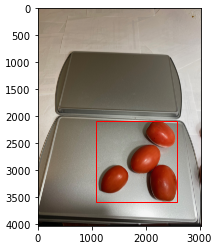
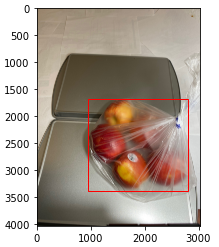

Wanneer het model alleen dit soort afbeeldingen op een weegschaal zou krijgen als input heb je daarnaast geen eigen data nodig. Als de implementatie wisselende omstandigheden heeft moet eigen data worden toegevoegd (als geen representatieve set bestaat). 

In [30]:
# Notebook waar genoemde dataset wordt ingeladen (opschonen mogelijk)
FileLink('Dataset Samenstellen\\PILLOW Data Loading - Fruits & Vegetable Detection for YOLOv4.ipynb')

E:\Studie\Stage\Notebooks\Dataset Samenstellen\PILLOW Data Loading - Fruits & Vegetable Detection for YOLOv4.ipynb

*[Het verschil tussen PILLOW en OpenCV](https://learningdaily.dev/what-is-the-difference-between-opencv-and-pillow-457e37b7d530)*

#### **Overwegingen bij maken eigen Dataset**

In het geval je de keuze maakt een eigen dataset te maken zijn er een paar dingen om rekening mee te houden:

**Variatie in Omstandigheden:**
   - **Licht:** Fotografeer onder verschillende lichtomstandigheden (zowel binnen als buiten, bij daglicht en kunstlicht) om de robuustheid van het model te verbeteren.
   - **Hoeken en Perspectieven:** Neem afbeeldingen vanuit verschillende hoeken en perspectieven om ervoor te zorgen dat het model objecten vanuit diverse gezichtspunten kan herkennen.
   - **Achtergronden:** Gebruik verschillende achtergronden om het model te helpen zich te concentreren op het object in plaats van op de achtergrond.

**Diversiteit van Objecten:**
   - **Verschillende Exemplaren:** Zorg voor foto's van verschillende exemplaren binnen dezelfde klasse om modeloverfit te vermijden en de generalisatie te bevorderen.
   - **Afwisseling in Maat en Vorm:** Variatie in de grootte en vorm van objecten binnen dezelfde klasse kan nuttig zijn om de veelzijdigheid van het model te verbeteren.

**Consistentie en Resolutie:**
   - **Resolutie:** Zorg dat alle afbeeldingen een consistente en voldoende hoge resolutie hebben om belangrijke details vast te leggen.
   - **Aspect Ratio:** Houd een consistente aspectverhouding aan om voorbereidingstijd te verminderen tijdens de preprocessing.

**Balans Tussen Klassen:**
   - **Gelijk Aantal Afbeeldingen per Klasse:** Verzamel een gelijk aantal afbeeldingen voor elke klasse om een gebalanceerd model te trainen zonder bias.


**(Bij Object Detection) Metadata en Labeling:**
   - **Nauwkeurige Labeling:** Zorg voor een nauwkeurige en consistente labeling van afbeeldingen. Overweeg het gebruik van tools voor het annoteren om dit proces te stroomlijnen.
   - **Metadata Vastleggen:** Houd eventueel aanvullende metadata bij, zoals locatie, tijdstip, en gebruikte apparatuur, wat nuttig kan zijn voor verdere analyse en verbetering van het model.

#### Web-Scraper

Als je voor welke reden dan ook extra afbeeldingen van het internet wilt halen. (Waarschijnlijk om de hoeveelheid afbeeldingen per klasse gelijk te maken.) Kan je dit doen door middel van een webscraper.

In [36]:
FileLink('Dataset Samenstellen\\webscraper.ipynb')

E:\Studie\Stage\Notebooks\Dataset Samenstellen\webscraper.ipynb

## Data Verwerken

### Gewenste Folder Structuur

Nu je alle data heb is het tijd om deze te verwerken. Dit kan zo simpel zijn als ze bij elkaar gooien of verdelen over verschillende folders, helaas is dit vaak niet het geval.

Vanaf dit punt is het ook erg belangrijk om te weten wat voor een model je gaat maken. Kies je voor Object Detection (modellen als YOLO) of voor Image Classification (modellen als ResNet).

In het geval je gebruik maakt van een Pre-Trained model verwacht het model een standaard input grootte, dus alle afbeeldingen moeten naar die 

Voor object detection is het ook van belang goed naar de label bestanden te kijken, hoe worden de hoeken van de bounding box aangegeven en is dit over alle data constistent? 

Afhankelijk van het type model dat je gaat trainen zijn er verschillende soorten aanbevolen structuren. Zorg dat je data op deze manier gestructuurd staat in het geval je gebruik wil maken van libraries (Extreem aan te raden). 

#### Image Classification
Bij image classification wil je de de afbeeldingen verdeeld per class name:

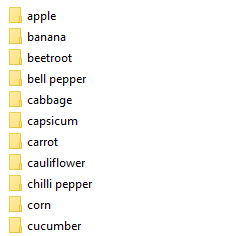

Je zou al de afbeeldingen kunnen verdelen over een test, train en validatie set.

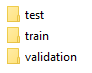

Doe dit op het moment dat je een specifiek idee hebt waar je welke afbeeldingen wilt hebben, zo niet doe het verdelen met code (de aanbevolen methode).

#### Image Detection

Bij image detection wil je alle afbeeldingen in de zelfde map hebben. 

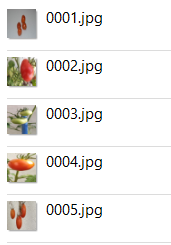

Daarnaast wil je een tweede folder met alle label files. 

De namen moeten het zelfde zijn zodat de code het herkent als paar. Deze twee folders kunnen ook weer over test, train en validatie worden gesplitst. Let hierbij wel op dat je de paren in dit proces niet splitst.

*Mogelijk nog stukje over andere structuur eigen dataloader*

### Zelf augmentatie toepassen

In [46]:
FileLink('Dataset Samenstellen\\Image Processing.ipynb')

E:\Studie\Stage\Notebooks\Dataset Samenstellen\Image Processing.ipynb

Voor de meeste projecten wil je dit waarschijnlijk niet zelf doen tenzij je tijdens het data processen heel graag wilt zien wat met elke afbeelding gebeurd voor deze het model in gaat. Het bestand is dus vooral ook om dit te kunnen zien dus klooi er even mee voor een beter beeld en de noodzaak van bepaalde stappen.

### Dataloader / Transformer

Het is aanbevolen om gebruik te maken van Dataloaders en Transformers. Hierdoor ben in het algemeen wel verplicht de bijhorende libraries te gebruiken van de loaderDit is een kleine opgave aangezien dataloaders het inladen van de data automatisch doet met de juiste structuur (van hier boven). Waarbij de Transformer de meegegeven aanpassingen 

Eerder heb je al kunnen zien hoe we door middel van pytorch de afbeeldingen kunnen inladen.

In [51]:
FileLink('Dataset Samenstellen\\PyTorch Data Loading - Vegetable Image Dataset.ipynb')

E:\Studie\Stage\Notebooks\Dataset Samenstellen\PyTorch Data Loading - Vegetable Image Dataset.ipynb

Echter was hier de Transformer nog minimaal:
```
# Transformeer de data bij het inladen
transform = transforms.Compose([
#     transforms.Resize((128, 128)), # de afbeeldingen zijn al het zelfde formaat (en niet te groot dus deze stap is niet nodig)
    transforms.ToTensor()
])
```
Deze transform was (te) minimaal, voor meer informatie lees de [transform docs](https://pytorch.org/vision/stable/transforms.html) of Google de taak die je zoekt. Of kijk verder bij model trainen naar hoe de transform is gebruikt voor data augmentation.

## Model Trainen

Voor het trainen van een Computer Vision model heb je al een keuze gemaakt tussen Image Detection en Image Classification. Je kan nog de keuze maken tussen pre-trained en een eigen model structuur zonder weights en biases.

#### Optimizer

De optimizer is verantwoordelijk voor het aanpassen van kenmerken van het neurale netwerk, zoals gewichten en leersnelheden.
Zoals de naam al doet denken is dit gericht op het optimaliseren van het train process.
Vaak is het oke (vooral voor een eerste model) om te beginnen met een Adam Optimizer om later een andere te kiezen.
Als dit model een slecht resultaat geeft is het zeer aannemelijk dat het probleem ergens anders ligt en raad ik aan de andere stappen eerst te controleren.

[Meer weten over optimizers?](https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/)

Voor het geval je een specifieke optimizer zoekt bekijk onderstaande notebook voor een overzicht waarom wel of niet te gebruiken voor de huidige klus. 

In [58]:
# Nog maken
# FileLink('OptimizerFile.ipynb')

#### Metrics

Tijdens het trainen zijn er verschillende metrics om in de gaten te houden. Bij image detection komen er nog een paar bij, deze worden in het `Image Detection` deel behandeld.
Bij image classification zijn verschillende metrics die je kunt gebruiken om de prestaties van je model te evalueren. Hier zijn de meest voorkomende:

1. **Accuracy**: Dit meet het percentage correcte voorspellingen over alle voorbeelden. Hoewel het nuttig is, kan het misleidend zijn in geval van een scheve klassenverdeling.

2. **Precision**: Dit is het percentage daadwerkelijke positieve voorspellingen uit alle positieve voorspellingen. Het is vooral nuttig als de kosten van vals-positieven hoog zijn.

3. **Recall (of Sensitivity)**: Dit is het percentage correcte positieve voorspellingen uit alle daadwerkelijke positieve gevallen. Het is cruciaal wanneer de kosten van gemiste positieve voorbeelden hoog zijn.

4. **F1-score**: Dit is het harmonisch gemiddelde van precision en recall. Het is nuttig wanneer je een balans wilt vinden tussen precision en recall, vooral bij een ongelijke klassenverdeling.

5. **Confusion Matrix**: Dit is een tabel die de prestaties van een classificatiemodel laat zien, met de werkelijke klassen tegenover de voorspelde klassen. Het geeft inzicht in correct geclassificeerde en verkeerd geclassificeerde voorspellingen.

Deze metrics helpen je verschillende aspecten van je modelprestaties te begrijpen, en de keuze van welke te gebruiken hangt vaak af van de specificiteiten en eisen van je project. Bepaal opbasis van wat voor jou model het handigst op welke metrics je het meest gaat letten. In het geval je het zo simpel mogelijk voor jezelf wilt maken let dan op de `F1-score`.

### Image Classification

Dit type modellen zoals de naam al zegt probeert verschillende klasse te kunnen herkennen. Dit doet het door naar heel de afbeelding te kijken en op basis hiervan geeft het een voorspelling voor elke classen.

Bekijk zo eerst een vd minimale modellen om de structuur door te krijgen voor we meer geavanceerde methodes gaan gebruiken.

In [63]:
# Pre-trained ResNet50 - Zonder extra toevoegingen
FileLink('Model Training\\ResNet50_basics.ipynb')

E:\Studie\Stage\Notebooks\Model Training\ResNet50_basics.ipynb

In onderstaande notebook werken we ook een ResNet50 model uit. Maar in dit geval hebben we toevoegingen gedaan om overfitting tegen te gaan.

In [65]:
# Pre-trained ResNet50 - Onderbouw keuzes 
FileLink('Model Training\\ResNet50.ipynb')

E:\Studie\Stage\Notebooks\Model Training\ResNet50.ipynb

### Image Detection

Hierbij wordt een object in de afbeelding gevonden ipv dat de hele afbeelding als het object of de klasse wordt gezien. Dit heeft verschillende effecten als een andere structuur voor de data en het model, de benodigde hoeveelheid data, trainingstijd maar vooral ook het resultaat van het model.

In [67]:
FileLink('Model Training\\Training YOLO model.ipynb')

E:\Studie\Stage\Notebooks\Model Training\Training YOLO model.ipynb

## Evaluatie

Als het goed is heb je nu een eerste getrainde model! Gefeliciteerd, helaas is de kans groot dat het niet gelijk doet wat je wilt. Daardoor gaan we nu de resulaten analyseren, in het algemeen zijn de problemen te ver eenvoudigen tot Overfitting en Underfitting.
- **Underfitting:** Het model heeft niet genoeg capaciteit om patronen in de data te herkennen. Dit kan liggen aan gebrek van data of een te simpel model.
- **Overfitting:** Het model werkt uitstekend op de trainingsdata maar faalt op nieuwe data. Te lange train tijd, te complex model voor de taak, te weinig diversiteit in en buiten de classe of verkeerde hyper-parameters zijn allemaal mogelijkheden voor overfitting. (In mijn ervaring) heb je vaak ook meer te maken met overfitting dan met underfitting. Overfitting is vaak ook moeilijker te herkennen en kan ook tijdens het train proces niet op lijken te duiken tot het in de implementatie te laat is. (Door bijvoorbeeld indentiek of bijna identieke afbeeldingen in de validatie set te hebben.)
    In de voorgaande notebooks zijn al verschillende counter measures te zien.
  (*Misschien is het handig om een specifieke notebook voor overfitting te maken?*)



## Implementatie

Het getrainde model kan op verschillende manieren geimplementeerd worden, aangezien de kans groot is dat het model in Mendix gedraaid zal worden zullen we dit uitvoeren. Hiervoor moet het model omgezet worden naar het bestandtype .onnx om in Mendix bruikbaar te zijn. Dit kunnen beide onderstaande bestanden doen.

In [71]:
FileLink('Model to mendix\\torch_to_onnx - stepbystep.ipynb')

E:\Studie\Stage\Notebooks\Model to mendix\torch_to_onnx - stepbystep.ipynb

In [72]:
FileLink('Model to mendix\\torch_to_onnx.ipynb')

E:\Studie\Stage\Notebooks\Model to mendix\torch_to_onnx.ipynb

Nu je het correcte bestandstype hebt gaat de rest van je project door in Mendix. Hier moet je het model importeren als ML_model_mapping, het moeilijke gedeelde zit m in de pre en post processing. Je moet deze zo aanpassen zodat **de preprocessing stappen exact de zelfde output geeft als het model als input verwacht**. Waarna de post processing de output moet omzetten naar een bruikbaar resultaat.

(*Maak een FileLink voor het aanpassen van de pre en post processing of alle stappen van het in mendix implementeren op basis van screenshots*)